In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sales_processing import fill_in_dates, add_date_features, kung_i_baren, normalize_sales, denormalize_sales
from holiday_processing import add_holidays
from pandas.plotting import lag_plot

         Date  Company         Sales
2  2020-01-01        0      0.000000
5  2020-01-02        0  25421.830339
8  2020-01-03        0  64633.125617
11 2020-01-04        0  80890.181099
14 2020-01-05        0  30590.049381


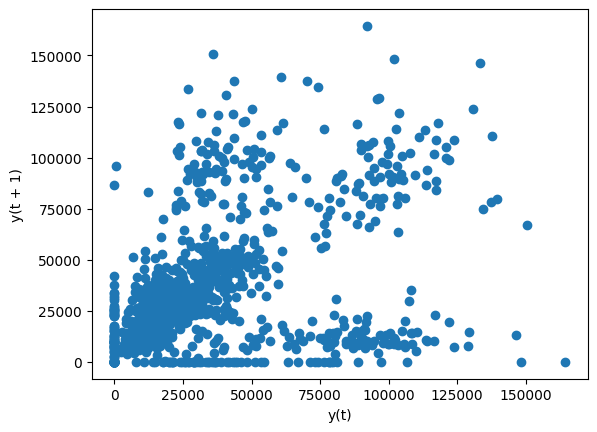

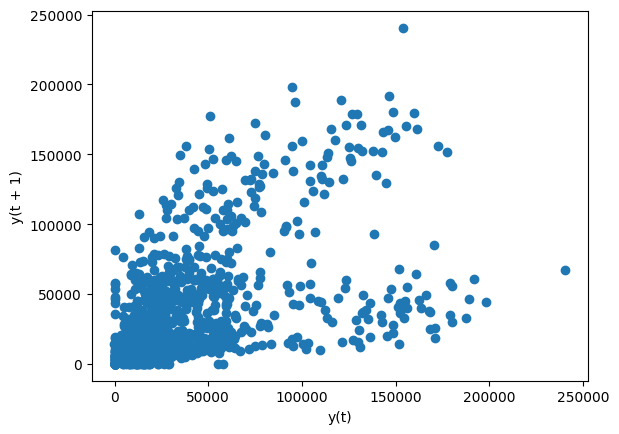

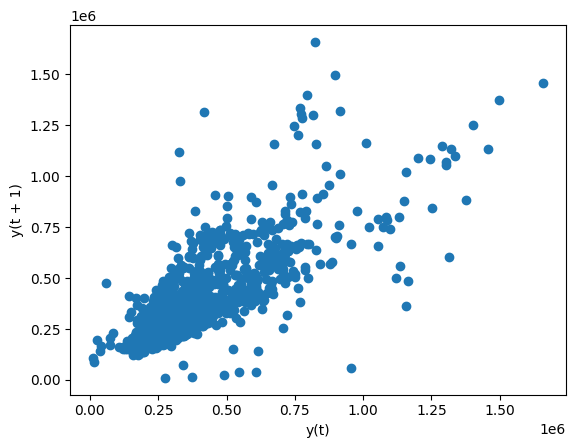

'\nsteg\n0. preprocess data\n1. Find the appropriate order of the AR model using ACF and PACF\n2. Fit the model using suitable method, try different types, ex maximun likelihood estimation or least squares or bayesian methods\n3. Evaluate the model \n'

In [83]:
sales = pd.read_csv('data/caspecoTrainingData.csv')

dates = pd.date_range('2020-01-01', '2023-01-04')

sales = fill_in_dates(sales, dates)

#divide sales into Company
sales_company_1 = sales[sales['Company'] == 0]
sales_company_2 = sales[sales['Company'] == 1]
sales_company_3 = sales[sales['Company'] == 2]

print(sales_company_1.head())
sales_company_1 = sales_company_1.drop(columns=['Company', 'Date'])
sales_company_2 = sales_company_2.drop(columns=['Company', 'Date'])
sales_company_3 = sales_company_3.drop(columns=['Company', 'Date'])
lag_plot(sales_company_1)
plt.show()
lag_plot(sales_company_2)
plt.show()
lag_plot(sales_company_3)
plt.show()

'''
steg
0. preprocess data
1. Find the appropriate order of the AR model using ACF and PACF
2. Fit the model using suitable method, try different types, ex maximun likelihood estimation or least squares or bayesian methods
3. Evaluate the model 
'''

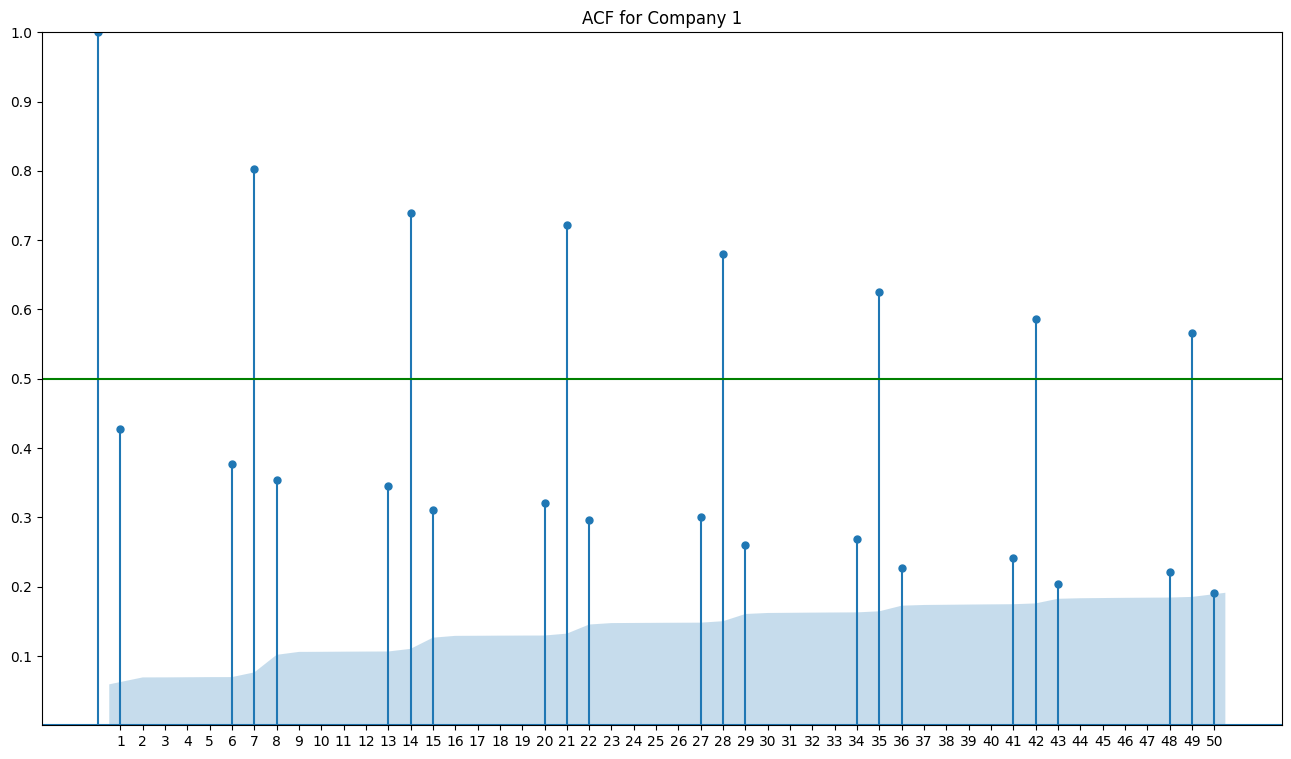

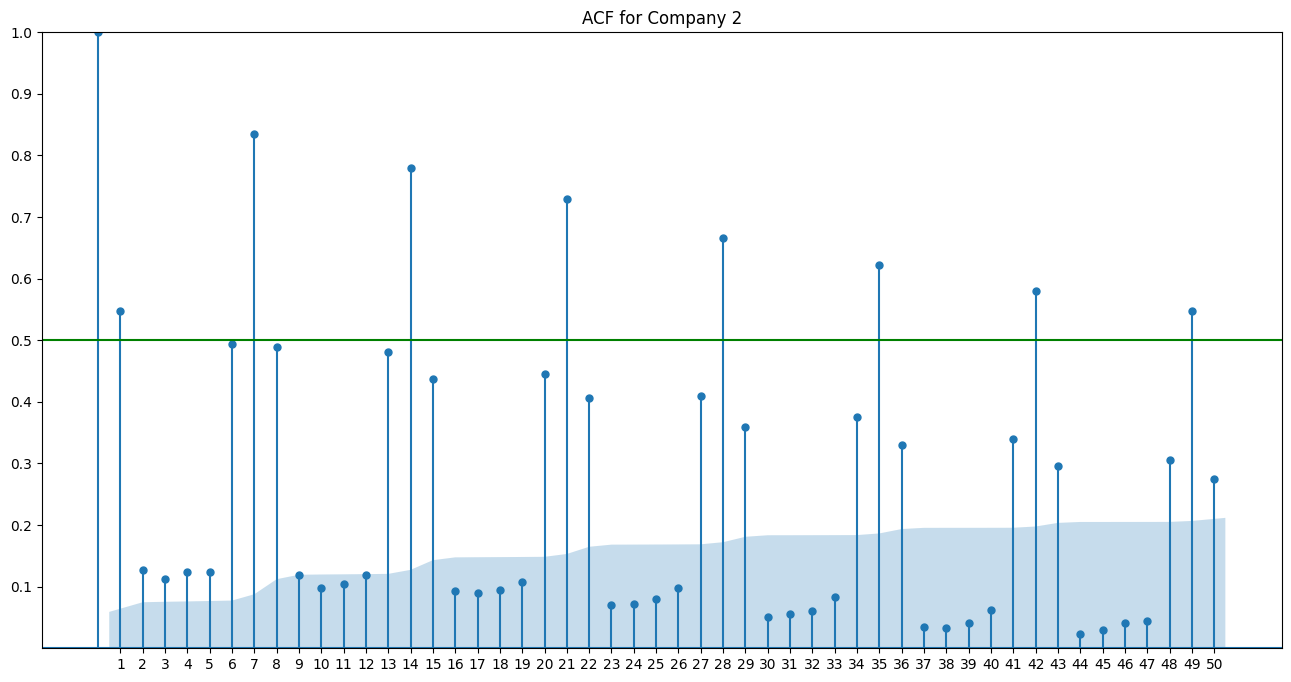

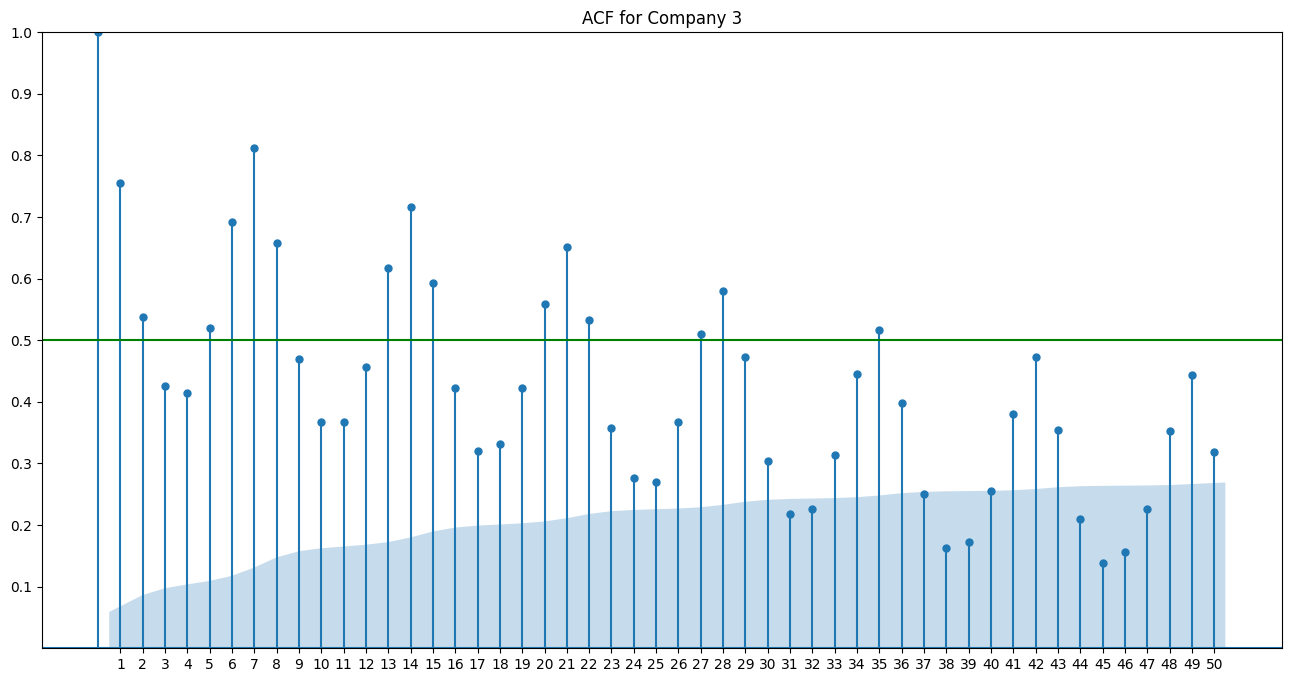

C:\Users\annah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


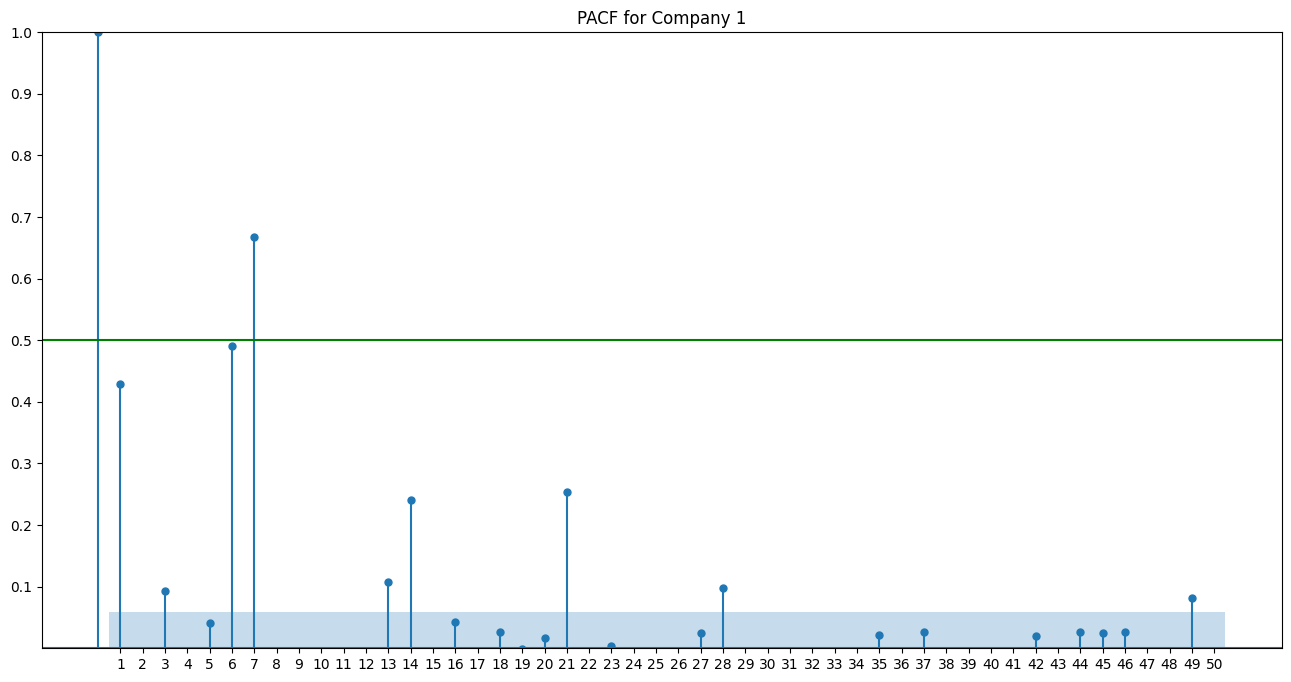

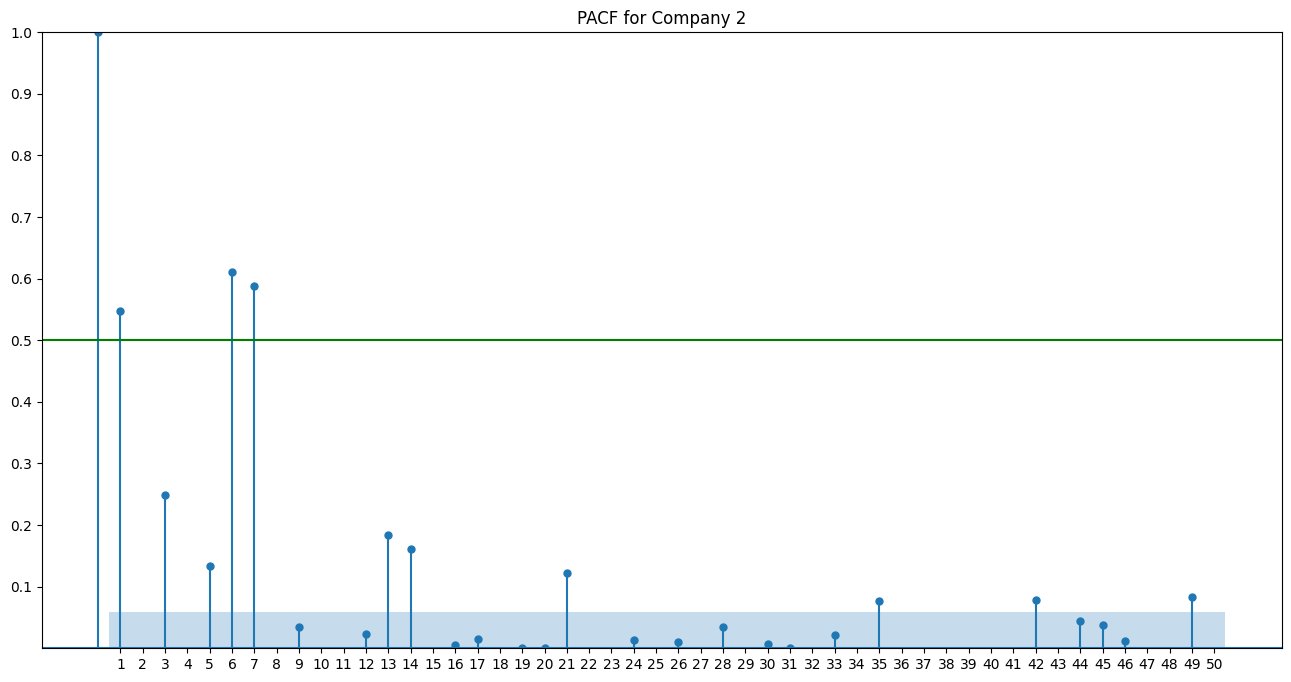

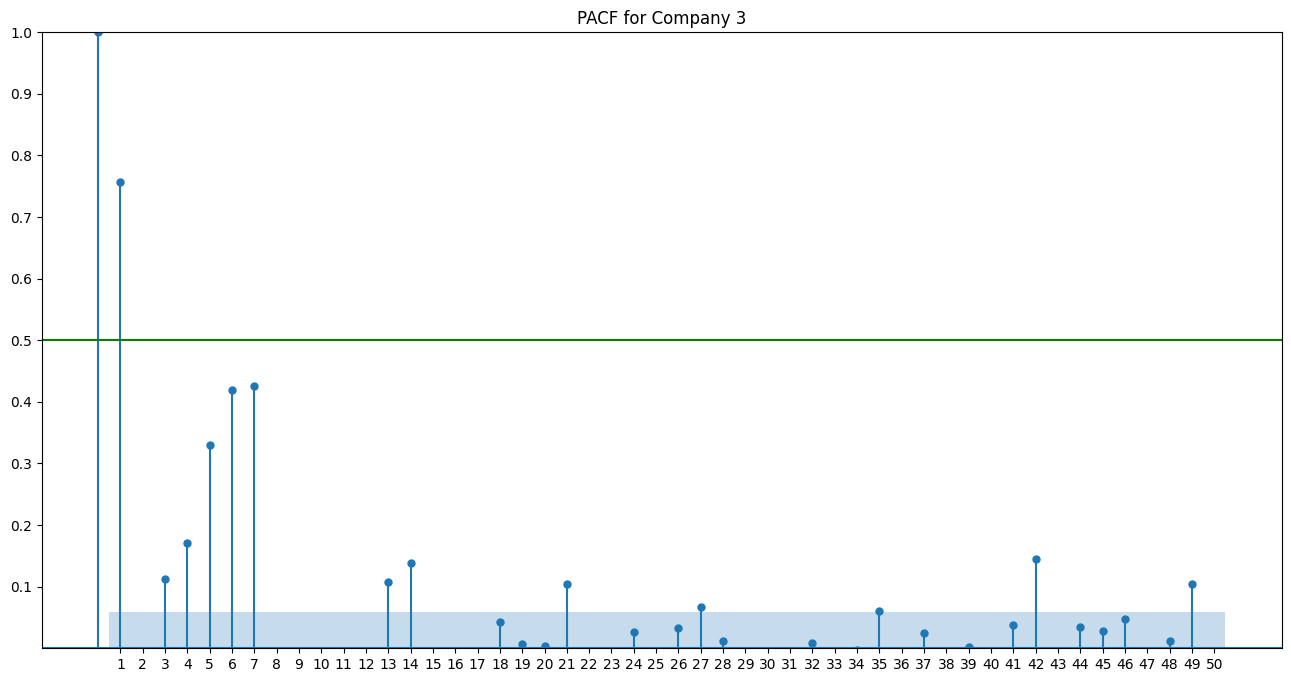

In [84]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

fig, ax = plt.subplots(figsize=(16,9))
plot_acf(sales_company_1, lags=50, ax=ax)
plt.ylim([0,1])
plt.yticks(np.arange(0.1, 1.1, 0.1))
plt.xticks(np.arange(1, 51, 1))
plt.axhline(y=0.5, color="green")
plt.title("ACF for Company 1")
plt.show()

fig, ax = plt.subplots(figsize=(16,8))
plot_acf(sales_company_2, lags=50, ax=ax)
plt.ylim([0,1])
plt.yticks(np.arange(0.1, 1.1, 0.1))
plt.xticks(np.arange(1, 51, 1))
plt.axhline(y=0.5, color="green")
plt.title("ACF for Company 2")
plt.show()

fig, ax = plt.subplots(figsize=(16,8))
plot_acf(sales_company_3, lags=50, ax=ax)
plt.ylim([0,1])
plt.yticks(np.arange(0.1, 1.1, 0.1))
plt.xticks(np.arange(1, 51, 1))
plt.axhline(y=0.5, color="green")
plt.title("ACF for Company 3")
plt.show()

fig, ax = plt.subplots(figsize=(16,8))
plot_pacf(sales_company_1, lags=50, ax=ax)
plt.ylim([0,1])
plt.yticks(np.arange(0.1, 1.1, 0.1))
plt.xticks(np.arange(1, 51, 1))
plt.axhline(y=0.5, color="green")
plt.title("PACF for Company 1")
plt.show()

fig, ax = plt.subplots(figsize=(16,8))
plot_pacf(sales_company_2, lags=50, ax=ax)
plt.ylim([0,1])
plt.yticks(np.arange(0.1, 1.1, 0.1))
plt.xticks(np.arange(1, 51, 1))
plt.axhline(y=0.5, color="green")
plt.title("PACF for Company 2")
plt.show()

fig, ax = plt.subplots(figsize=(16,8))
plot_pacf(sales_company_3, lags=50, ax=ax)
plt.ylim([0,1])
plt.yticks(np.arange(0.1, 1.1, 0.1))
plt.xticks(np.arange(1, 51, 1))
plt.axhline(y=0.5, color="green")
plt.title("PACF for Company 3")
plt.show()




In [85]:
#AD fuller test taget från https://towardsdatascience.com/why-does-stationarity-matter-in-time-series-analysis-e2fb7be74454#:~:text=Stationarity%20is%20an%20important%20concept,is%20independent%20of%20one%20another.
from statsmodels.tsa.stattools import adfuller

def ADF_Cal(x):
    result = adfuller(x)
    ADF_stat = result[0]
    p = result[1]
    print("ADF Statistic: %f" % ADF_stat)
    print("p-value: %f" % p)
    print("Critical Values")
    levels = [.01, .05, .1]
    i = 0
    for key,value in result[4].items():
        print('\t%s: %.3f' % (key,value))
        hyp = p < levels[i]
        if ADF_stat < value:
            cert = (1-levels[i])*100
            print("{}% certain this is staionary".format(cert))
            print('Reject H0: {}'.format(hyp))
            break
        i = i+1
        if i >= 3:
            print("Less than 90% certain that data is stationary")
            print('Reject H0: {}'.format(hyp))
print("Calculating ADF test for Company 1")
ADF_Cal(sales_company_1)
print("Calculating ADF test for Company 2")
ADF_Cal(sales_company_2)
print("Calculating ADF test for Company 3")
ADF_Cal(sales_company_3)


Calculating ADF test for Company 1
ADF Statistic: -2.746344
p-value: 0.066356
Critical Values
	1%: -3.436
	5%: -2.864
	10%: -2.568
90.0% certain this is staionary
Reject H0: True
Calculating ADF test for Company 2
ADF Statistic: -2.392055
p-value: 0.143991
Critical Values
	1%: -3.436
	5%: -2.864
	10%: -2.568
Less than 90% certain that data is stationary
Reject H0: False
Calculating ADF test for Company 3
ADF Statistic: -3.000164
p-value: 0.034879
Critical Values
	1%: -3.436
	5%: -2.864
95.0% certain this is staionary
Reject H0: True


In [86]:
from pandas import concat

dataframe = concat([sales_company_1.shift(1), sales_company_1], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

dataframe = concat([sales_company_2.shift(1), sales_company_2], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

dataframe = concat([sales_company_3.shift(1), sales_company_3], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)


          t-1       t+1
t-1  1.000000  0.428253
t+1  0.428253  1.000000
          t-1       t+1
t-1  1.000000  0.547889
t+1  0.547889  1.000000
         t-1      t+1
t-1  1.00000  0.75671
t+1  0.75671  1.00000


In [87]:
from statsmodels.tsa.ar_model import AutoReg

training = 0.80

sales_company_1.index = range(0, len(sales_company_1))
sales_company_2.index = range(0, len(sales_company_2))
sales_company_3.index = range(0, len(sales_company_3))

train_company_1 = sales_company_1[:int(training*(len(sales_company_1)))]
test_company_1 = sales_company_1[int(training*(len(sales_company_1))):]
train_company_2 = sales_company_2[:int(training*(len(sales_company_2)))]
test_company_2 = sales_company_2[int(training*(len(sales_company_2))):]
train_company_3 = sales_company_3[:int(training*(len(sales_company_3)))]
test_company_3 = sales_company_3[int(training*(len(sales_company_3))):]

model_company_1 = AutoReg(train_company_1, lags=7).fit()
model_company_2 = AutoReg(train_company_2, lags=7).fit()
model_company_3 = AutoReg(train_company_3, lags=2).fit()



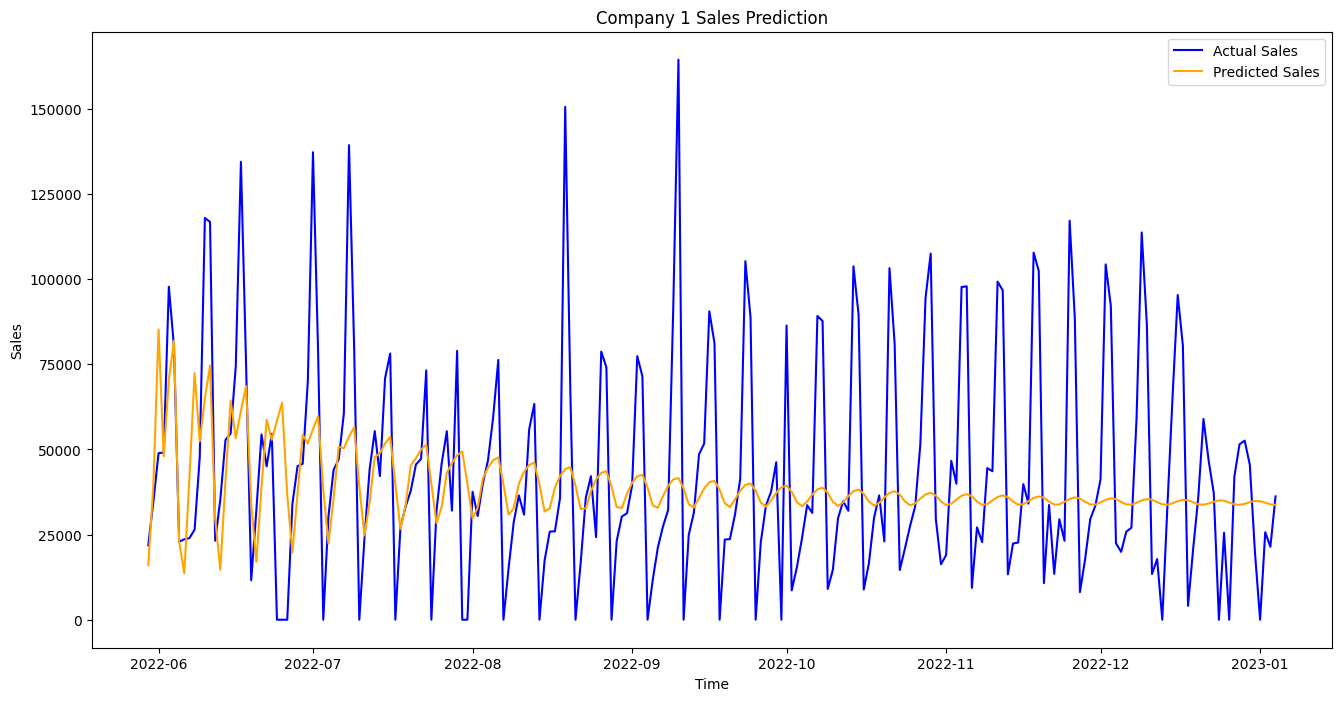

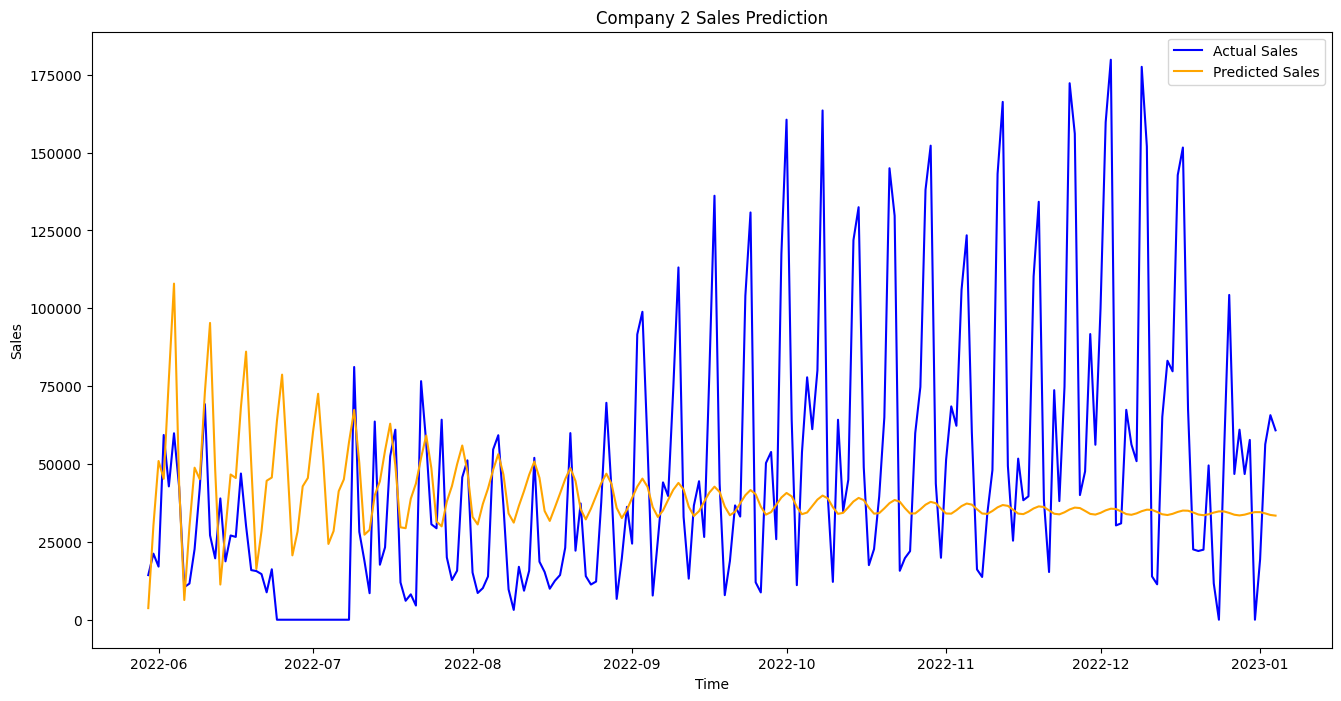

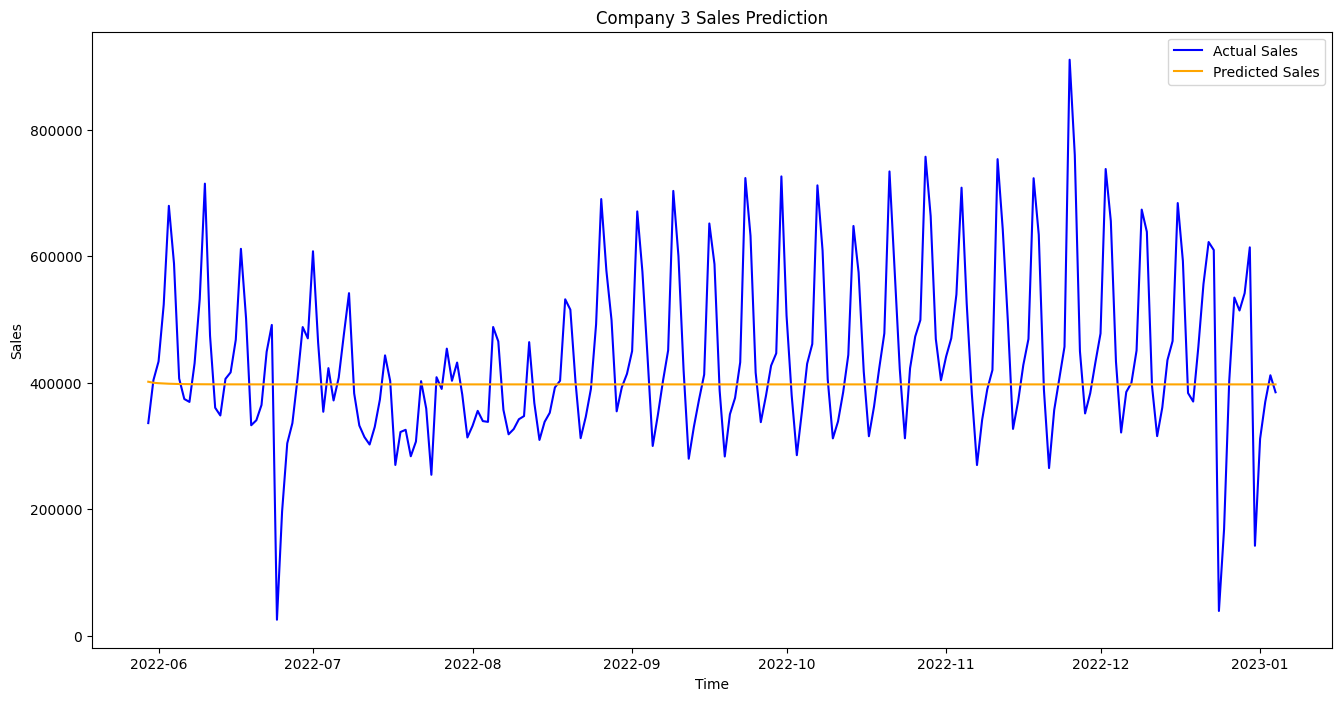

In [88]:
forecast_company_1 = model_company_1.predict(start=len(train_company_1), end=len(train_company_1)+len(test_company_1)-1)
forecast_company_2 = model_company_2.predict(start=len(train_company_2), end=len(train_company_2)+len(test_company_2)-1)
forecast_company_3 = model_company_3.predict(start=len(train_company_3), end=len(train_company_3)+len(test_company_3)-1)

sales_company_1 = sales[sales['Company'] == 0]
sales_company_2 = sales[sales['Company'] == 1]
sales_company_3 = sales[sales['Company'] == 2]
test_company_1.index = sales_company_1[int(training*(len(sales_company_1))):]['Date']
test_company_2.index = sales_company_2[int(training*(len(sales_company_2))):]['Date']
test_company_3.index = sales_company_3[int(training*(len(sales_company_3))):]['Date']

forecast_company_1.index = sales_company_1[int(training*(len(sales_company_1))):]['Date']
forecast_company_2.index = sales_company_2[int(training*(len(sales_company_2))):]['Date']
forecast_company_3.index = sales_company_3[int(training*(len(sales_company_3))):]['Date']



plt.figure(figsize=(16,8))
plt.plot(test_company_1, color='blue', label='Actual Sales')
plt.plot(forecast_company_1, color='orange', label='Predicted Sales')
plt.title('Company 1 Sales Prediction')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()

plt.figure(figsize=(16,8))
plt.plot(test_company_2, color='blue', label='Actual Sales')
plt.plot(forecast_company_2, color='orange', label='Predicted Sales')
plt.title('Company 2 Sales Prediction')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()

plt.figure(figsize=(16,8))
plt.plot(test_company_3, color='blue', label='Actual Sales')
plt.plot(forecast_company_3, color='orange', label='Predicted Sales')
plt.title('Company 3 Sales Prediction')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()
